In [11]:
import preprocessing
import pandas as pd
import numpy as np
import helper
import constants
import metrics
from sklearn.decomposition import PCA
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Join = os.path.join


In [12]:
ind1 = 0
ind2 = 5

trainpath = Join(constants.PREPROCESS_STORE, 'Train')

x0 = helper.get_cube_by_index(trainpath, 0, 'mat_nobg.pickle')
X = [*x0]
y = [constants.LABELS[0] for i in range(x0.shape[0])]
for i in range(1,16):
    xx = helper.get_cube_by_index(trainpath, i, 'mat_nobg.pickle')
    X.extend(xx)
    yy = [constants.LABELS[i] for k in range(xx.shape[0])]
    y.extend(yy)

genes = [i for i in range(241)]
data = pd.DataFrame(data=X, columns=genes)
data.loc[:,'class'] = y
data.head()

In [13]:
# ind1 = 4
# ind2 = 7

# trainpath = Join(constants.PREPROCESS_STORE, 'Train')

# x1 = helper.get_cube_by_index(trainpath, ind1, 'mat_nobg.pickle')
# x2 = helper.get_cube_by_index(trainpath, ind2, 'mat_nobg.pickle')
# y1 = [constants.LABELS[ind1] for i in range(x1.shape[0])]
# y2 = [constants.LABELS[ind2] for i in range(x2.shape[0])]

# X = [*x1, *x2]
# genes = [i for i in range(241)]
# data = pd.DataFrame(data=X, columns=genes)
# data.loc[:, 'class'] = [*y1, *y2]
# data.head()


,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,class
0,-0.429047,-0.414540,-0.412301,-0.396069,-0.387379,-0.394323,-0.397639,-0.398585,-0.396979,-0.405700,...,-1.074888,-1.072057,-1.062504,-1.055799,-1.049106,-1.036381,-1.038800,-1.021206,-1.022599,Enterobactercloacal
1,-0.407944,-0.388871,-0.381045,-0.396627,-0.392901,-0.375877,-0.377708,-0.380861,-0.403964,-0.397925,...,-1.100663,-1.105835,-1.098608,-1.086386,-1.075963,-1.077417,-1.056346,-1.043834,-1.049475,Enterobactercloacal
2,-0.381135,-0.414028,-0.396132,-0.402200,-0.369361,-0.381429,-0.382445,-0.372381,-0.376141,-0.365374,...,-1.120304,-1.113563,-1.104017,-1.088737,-1.084111,-1.081640,-1.068115,-1.071942,-1.055407,Enterobactercloacal
3,-0.366870,-0.367128,-0.381773,-0.375693,-0.389513,-0.385559,-0.371015,-0.355581,-0.363897,-0.381000,...,-1.140452,-1.133873,-1.128018,-1.120726,-1.110430,-1.119406,-1.101063,-1.096556,-1.085374,Enterobactercloacal
4,-0.408371,-0.388964,-0.375068,-0.396638,-0.384308,-0.389454,-0.382358,-0.380409,-0.361128,-0.371535,...,-1.153965,-1.145961,-1.135603,-1.131100,-1.115487,-1.110664,-1.110261,-1.108219,-1.038271,Enterobactercloacal


[90.2  3.6  1.8  0.2  0.2  0.2  0.2]


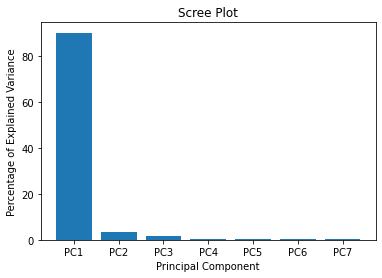

In [14]:
#########################
#
# Perform PCA on the data
#
#########################
# First center and scale the data
# scaled_data = preprocessing.scale(data.T)


# x = StandardScaler().fit_transform(x)
pca = PCA(n_components=7)  # create a PCA object
pca.fit(X)  # do the math
pca_data = pca.transform(X)  # get PCA coordinates for scaled_data

#########################
#
# Draw a scree plot and a PCA plot
#
#########################

#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

print(per_var)
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


In [15]:
pca = PCA(n_components=4)  # create a PCA object
pca.fit(X)  # do the math
pca_data = pca.transform(X)  # get PCA coordinates for scaled_data
principalDf = pd.DataFrame(data=pca_data, columns=['pca1', 'pca2', 'pca3', 'pca4'])
finalDf = pd.concat([principalDf, data['class']], axis=1)


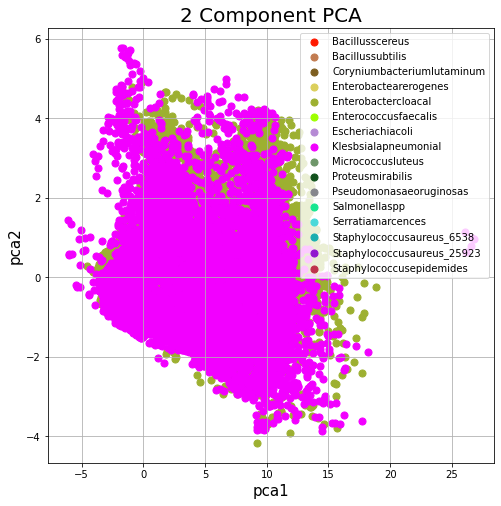

In [10]:
pca1 = 'pca1'
pca2 = 'pca2'
targets = [constants.LABELS[i] for i in range(16)]
colors = [constants.COLORS_HEX[constants.LABELS[i]] for i in range(16)]
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel(pca1, fontsize=15)
ax.set_ylabel(pca2, fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)


for target, color in zip(targets, colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, pca1],
               finalDf.loc[indicesToKeep, pca2], c=color, s=50)
ax.legend(targets)
ax.grid()
